In [1]:
from matplotlib import pyplot as plt
import dit
from dit.rate_distortion import curves
from dit.rate_distortion import RDCurve, IBCurve

# Rate Distortion Theory

Given $X$, we want to find its representation $\tilde{X}$ that compresses $X$ as much as possible while also satisfying a user-defined distortion rate $\langle d(x, \tilde{x})\rangle$. 


The minimum rate (compression rate) that $X$ can be compressed via $\tilde{X}$ with a fixed distortion is what is so-called radistorion curve $R(D)$:

$$
R(D) = \min_{q(\tilde{x} | x;) } I(X; \tilde{X})   \ \text{s.t.}  \langle d(x, \tilde{x}) \rangle \le D.
$$

Using the Lagrange method, we can have:

$$
\mathcal{L} = I(X; \tilde{X}) + \beta \langle d(x, \tilde{x}) \rangle.
$$

Solving for each $\beta$, we get a point on the curve $R(D)$.

In [2]:
# d_rd = dit.Distribution(['0', '1'], [1/2, 1/2])

# RDCurve(d_rd, beta_num=26).plot();

# Information Bottleneck

In information bottleneck, we have another variable $Y$ that $X$ has information about. In this case, we want $\tilde X$ to compress $X$ and preserve information about $Y$ as much as possible. The distorition becomes:
$$
d(x, \tilde{x}) = D\big( p(Y|x) \| q(Y| \tilde{x}) \big),
$$

where $D$ is a divergence measure. We also have an assumption that $\tilde{X} - X - Y$ forms a Markov chain, i.e. $\tilde{X} \perp Y | X$.   Typically, the divergence is the Kullback-Leibler Divergence, yieiding

$$
\begin{align*}
\langle d(x, \tilde{x}) \rangle &= \sum_{x, \tilde{x} } q(x, \tilde{x} )  D_{KL}\big( p(Y|x) \| q(Y| \tilde{x}) \big) \\
&= \sum_{x, \tilde{x} } q(x, \tilde{x} ) \sum_{y} p(y|x) \log \frac{p(y|x)}{q(y|\tilde{x})}  \\
&= \sum_{x, \tilde{x}, y } q(x, \tilde{x} ) p(y|x) \log \frac{p(y|x)}{q(y|\tilde{x})}  \\
&= \sum_{x, \tilde{x}, y } q(\tilde{x} | x ) p(x) p(y|x)\log \frac{p(y|x)}{q(y|\tilde{x})}  \\
&= \sum_{x, \tilde{x}, y } q(\tilde{x} | x, y ) p(x) p(y|x)\log \frac{p(y|x)}{q(y|\tilde{x})}  \tag{conditional indp.} \\
&= \sum_{x, \tilde{x}, y } q(\tilde{x},  x, y )\log \frac{p(y|x)}{q(y|\tilde{x})} \\
&= \sum_{x, \tilde{x}, y } q(\tilde{x},  x, y )\log \frac{p(y|x) p(x) p(y) q(\tilde{x})}{q(y|\tilde{x})p(x) p(y) q(\tilde{x})} \\
&= \sum_{x, \tilde{x}, y } q(\tilde{x},  x, y )\log \frac{p(y|x) p(x) }{p(x) p(y)} \frac{p(y) q(\tilde{x})}{q(y|\tilde{x})q(\tilde{x})} \\
&= \sum_{x, \tilde{x}, y } q(\tilde{x},  x, y )  \log \frac{p(y|x) p(x) }{p(x) p(y)} - \sum_{x, \tilde{x}, y } q(\tilde{x},  x, y ) \log \frac{q(y|\tilde{x})q(\tilde{x})}{p(y) q(\tilde{x})} \\
&= I(X; Y) - I(\tilde{X}; Y) = I(X; Y | \tilde{X})
\end{align*}
$$

Therefore, the Lagrangian is: 

$$
\mathcal{L} = I(X; \tilde{X}) - \beta I(\tilde{X}; Y)
$$

In [3]:
import imp


# imp.reload(information_bottleneck)
# imp.reload(curves)
# imp.reload(plotting)


from dit.rate_distortion import RDCurve, IBCurveHack, plotting
from dit.divergences import pmf
from dit.rate_distortion import information_bottleneck
from dit.rate_distortion.information_bottleneck import InformationBottleneck, InformationBottleneckDivergence
from dit.divergences.pmf import variational_distance, relative_entropy

In [4]:
d_ib = dit.Distribution(['00', '02', '12', '21', '22'], [1/5]*5)

Source path:... /Users/heytitle/projects/dit/dit/rate_distortion/information_bottleneck.py
New var:....... self = <dit.rate_distortion.information_bottleneck.InformationBottleneck object at 0x122226590>
New var:....... dist = <dit.npdist.Distribution object at 0x1221f7d50>
New var:....... beta = 0.0
New var:....... alpha = 1.0
New var:....... rvs = [[0], [1]]
New var:....... crvs = []
New var:....... bound = None
New var:....... rv_mode = None
New var:....... __class__ = <class 'dit.rate_distortion.information_bottleneck.InformationBottleneck'>
14:51:13.011796 line        50             if rvs is None:
Source path:... /Users/heytitle/projects/dit/dit/rate_distortion/information_bottleneck.py
New var:....... self = <dit.rate_distortion.information_bottleneck.InformationBottleneck object at 0x122226590>
New var:....... ib_objective = <function InformationBottleneck._objective.<locals>.ib_objective at 0x11ecc1830>
New var:....... gib_objective = <function InformationBottleneck._objective.

diff pi0
[ 3.44639017e-08  3.44639017e-08  3.44639017e-08  3.44639017e-08
  3.44639017e-08  3.44639017e-08  3.44639017e-08  3.67141171e-08
  3.67141171e-08  3.67141171e-08  3.67141171e-08  4.45303751e-08
  4.45303751e-08  2.31752925e-07 -3.88578059e-16 -3.88578059e-16
 -3.88578059e-16 -3.88578059e-16 -3.88578059e-16 -3.88578059e-16
 -3.88578059e-16 -3.88578059e-16  1.27353317e-01  1.10424685e-01
  9.60989127e-02  8.39030488e-02  7.34668635e-02  6.44946335e-02
  5.67491886e-02  5.00380389e-02  4.42033801e-02  3.91155373e-02
  3.46666443e-02  3.07668038e-02  2.73405003e-02  2.43240014e-02
  2.16632464e-02  1.93123222e-02  1.72317724e-02  1.53878714e-02
  1.37515245e-02  1.22975765e-02  1.10042575e-02  9.85263909e-03
  8.82619605e-03  7.91054495e-03  7.09305678e-03  6.36267076e-03
  5.70965029e-03  5.12543524e-03  4.60247274e-03  4.13409803e-03
  3.71438709e-03  3.33812374e-03  3.00066567e-03  2.69788981e-03
  2.42614228e-03  2.18215584e-03  1.96303042e-03  1.76617616e-03
  1.58928671e-03

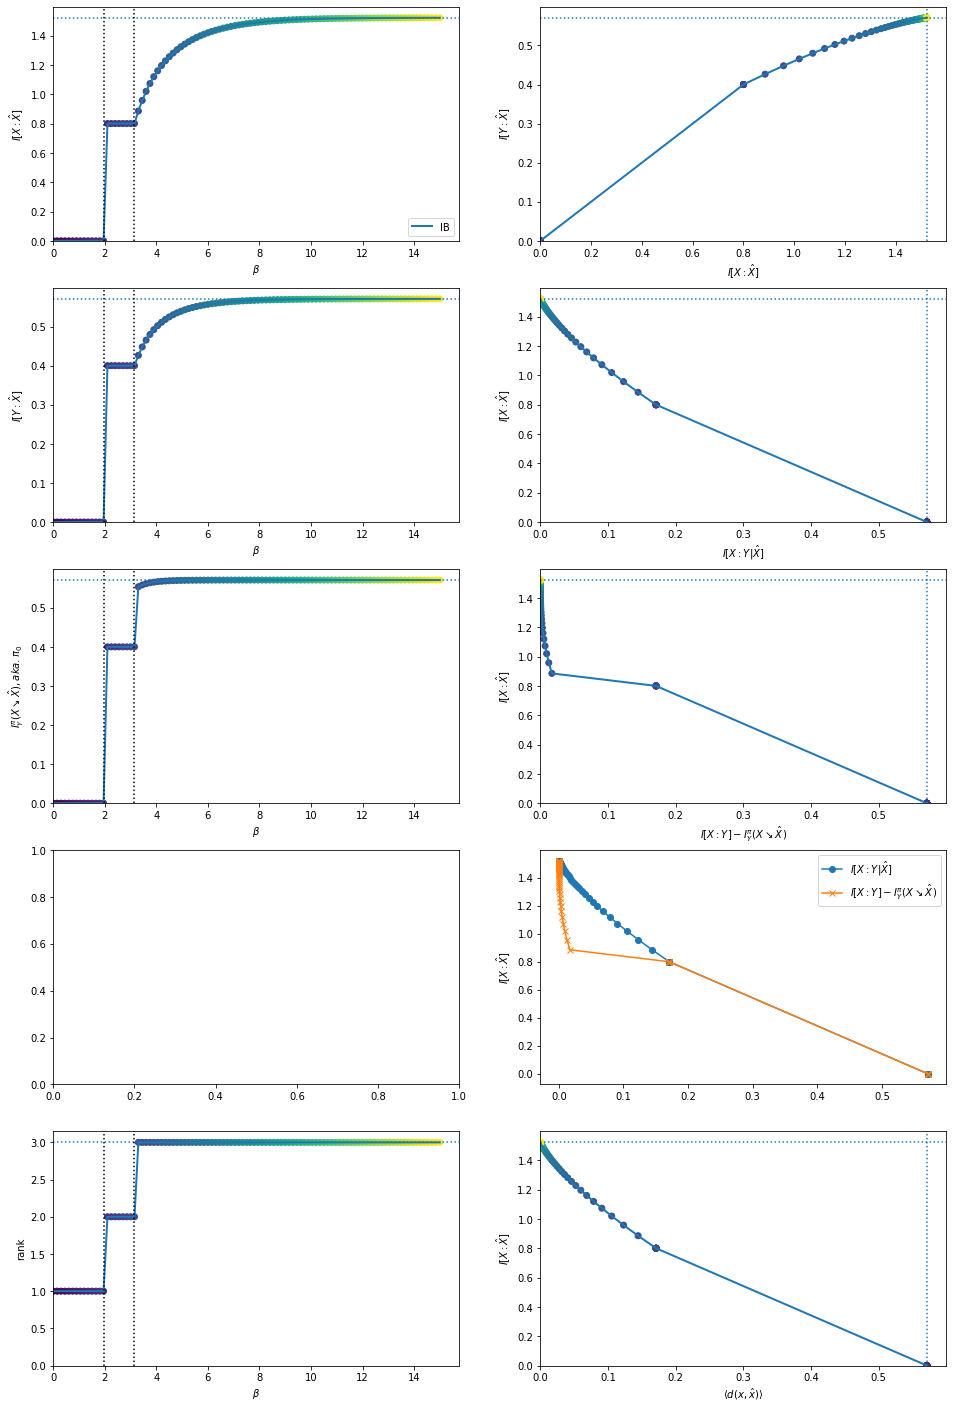

In [21]:
curve = IBCurveHack(d_ib)
curve.plot(downsample=1);

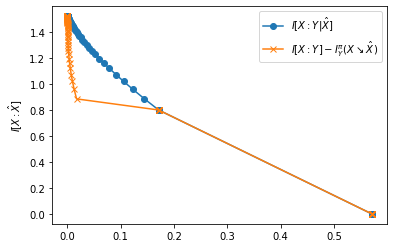

In [6]:
plt.plot(getattr(curve, "errors"), getattr(curve, "complexities"), 'o-', label=r"$I[X:Y|\hat{X}]$")
plt.plot(getattr(curve, "ixy_pi0"), getattr(curve, "complexities"), 'x-', label=r"$I[X:Y] - I^\pi_Y ( X \searrow \hat X )$")
plt.ylabel("$I[X:\hat{X}]$")
plt.legend()

#          plt.plto(getattr(curve, "ixy_pi0"), getattr(curve, "complexities", "pi0")

In [7]:
# IBCurveHack(d_ib, beta_num=26, divergence=relative_entropy).plot();

In [8]:
IBCurveHack

dit.rate_distortion.curves.IBCurveHack

# Testing some unique information stuff

In [9]:
from dit.pid.distributions import bivariates

In [10]:
d_reduced_or = bivariates['reduced or']

In [11]:
# d_reduced_or.set_rv_names('XYZ')
# d_reduced_or

In [12]:
from dit.pid import PID_Proj, PID_BROJA

In [13]:
print(PID_BROJA(d_reduced_or))

+---------+--------+--------+
| I_broja |  I_r   |   pi   |
+---------+--------+--------+
|  {0:1}  | 1.0000 | 0.6887 |
|   {0}   | 0.3113 | 0.0000 |
|   {1}   | 0.3113 | 0.0000 |
|  {0}{1} | 0.3113 | 0.3113 |
+---------+--------+--------+


In [14]:
print(PID_Proj(d_reduced_or))

+--------+--------+--------+
| I_proj |  I_r   |   pi   |
+--------+--------+--------+
| {0:1}  | 1.0000 | 0.6887 |
|  {0}   | 0.3113 | 0.0000 |
|  {1}   | 0.3113 | 0.0000 |
| {0}{1} | 0.3113 | 0.3113 |
+--------+--------+--------+


In [15]:
from dit.pid.iproj import projected_information

In [16]:
d_xor = dit.Distribution(['000','011', '101', '110'], [1/4.]*4)
d_xor.set_rv_names('YZX')


In [17]:
d = dit.Distribution(['000', '001', '010', '111'], [1. / 4] * 4) 
d.set_rv_names('SXY')
projected_information(d, 'X', 'X', 'S')

0.31127812445913283

In [18]:
dit.shannon.mutual_information(d, 'S', 'X')

0.31127812445913294

In [19]:
import numpy as np

In [20]:
np.array(range(10))[::1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])